In [1]:
import contractions
import matplotlib.pyplot as plt
import neattext as nt
import nltk
from nltk.corpus import words, names
from nltk.probability import FreqDist
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import re
import seaborn as sns
import string
#import textacy
#from textacy import preprocessing
#from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [2]:
filename=r'..\DatasetEnglish.csv'
data=pd.read_csv(filename)

In [3]:
data=data.drop(['index'], axis=1)
data.head()

,mongodb_id,has_preview,shortened_url,comments_enabled,comments_logged_in_only,talk_id,talk_slug,talk_title,talk_social_title,speakers_name,...,related_talk_5_id,speakers_typename,speakers_firstname,speakers_lastname,speakers_description,speakers_is_live,speakers_who_they_are,speakers_why_listen,external_service,external_service_code
0,652af294d95841780141bab7,False,https://go.ted.com/6Ryx,False,False,2147,aakash_odedra_a_dance_in_a_hurricane_of_paper_...,"A dance in a hurricane of paper, wind and light","A dance in a hurricane of paper, wind and light",Aakash Odedra,...,2273.0,AcmeSpeaker,Aakash,Odedra,Choreographer,True,Aakash Odedra sets raw ancient dance forms fro...,Based in the UK with a growing international r...,YouTube,T49IjKho5y8
1,652af54dd95841780141bab8,False,https://go.ted.com/6sZX,False,False,2683,aala_el_khani_what_it_s_like_to_be_a_parent_in...,What it's like to be a parent in a war zone,What it's like to be a parent in a war zone,Aala El-Khani,...,36063.0,AcmeSpeaker,Aala,El-Khani,Humanitarian psychologist,True,Aala El-Khani explores the needs of families a...,<p>Dr. Aala El-Khani researches and develops i...,YouTube,dY9f9bFctUE
2,652af54dd95841780141bab9,False,https://go.ted.com/6yKv,False,False,91525,aarathi_krishnan_5_ethical_principles_for_digi...,5 ethical principles for digitizing humanitari...,NaN,Aarathi Krishnan,...,24354.0,AcmeSpeaker,Aarathi,Krishnan,Tech and human rights ethicist,True,Aarathi Krishnan designs institutions and syst...,<p>Aarathi Krishnan works at the intersections...,YouTube,Ix8Cz-veat4
3,652af54dd95841780141baba,False,https://go.ted.com/6RgH,True,True,101504,aaron_bastani_a_socialist_perspective_on_the_p...,A socialist perspective on the pursuit of happ...,NaN,Aaron Bastani,...,972.0,AcmeSpeaker,Aaron,Bastani,Journalist,True,Aaron Bastani covers the issues that will defi...,<div>Aaron Bastani is the cofounder of Novara ...,YouTube,M6aq2SH-xVo
4,652af54dd95841780141babb,False,https://go.ted.com/6JLM,False,False,14610,aaron_duffy_lake_buckley_and_jack_foster_illus...,"""Illusions for a better society""","""Illusions for a better society""","Aaron Duffy, Lake Buckley and Jack Foster",...,NaN,AcmeSpeaker,Aaron,Duffy,NaN,False,Aaron Duffy began employing visual tricks into...,NaN,NaN,NaN


In [5]:
df=data.loc[:,['transcript','talk_id','talk_slug','published_timestamp', 'topic_0_name','related_talk_0_slug',
               'related_talk_1_slug','related_talk_2_slug','related_talk_3_slug','related_talk_4_slug','related_talk_5_slug']]
df.head()

,transcript,talk_id,talk_slug,published_timestamp,topic_0_name,related_talk_0_slug,related_talk_1_slug,related_talk_2_slug,related_talk_3_slug,related_talk_4_slug,related_talk_5_slug
0,(Music) (Applause),2147,aakash_odedra_a_dance_in_a_hurricane_of_paper_...,2014-12-05T16:00:35Z,music,the_lxd_in_the_internet_age_dance_evolves,pilobolus_a_dance_of_symbiosis,quixotic_fusion_dancing_with_light,kenichi_ebina_my_magic_moves,aakash_odedra_a_dance_in_a_hurricane_of_paper_...,joey_alexander_an_11_year_old_prodigy_performs...
1,"Worldwide, over 1.5 billion people experience...",2683,aala_el_khani_what_it_s_like_to_be_a_parent_in...,2017-02-10T15:49:37Z,psychology,anders_fjellberg_two_nameless_bodies_washed_up...,melissa_fleming_a_boat_carrying_500_refugees_s...,alexander_betts_our_refugee_system_is_failing_...,luma_mufleh_don_t_feel_sorry_for_refugees_beli...,melanie_nezer_the_fundamental_right_to_seek_as...,muhammed_idris_what_refugees_need_to_start_new...
2,Sociologist Zeynep Tufekci once said that his...,91525,aarathi_krishnan_5_ethical_principles_for_digi...,2022-06-14T14:45:13Z,technology,juan_enriquez_how_technology_changes_our_sense...,becca_heller_a_safe_pathway_to_resettlement_fo...,betul_kacar_we_could_kick_start_life_on_anothe...,robert_hakiza_refugees_want_empowerment_not_ha...,alexander_betts_our_refugee_system_is_failing_...,benedetta_berti_and_evelien_borgman_what_does_...
3,"Allow me to introduce myself. I’m a writer, j...",101504,aaron_bastani_a_socialist_perspective_on_the_p...,2023-01-20T15:54:11Z,technology,maja_bosnic_how_to_share_public_money_fairly,ted_ed_is_inequality_inevitable,katherine_mangu_ward_what_capitalism_gets_righ...,geoff_mulgan_post_crash_investing_in_a_better_...,nick_hanauer_beware_fellow_plutocrats_the_pitc...,tim_jackson_an_economic_reality_check
4,Narrator: We have you here today specifically...,14610,aaron_duffy_lake_buckley_and_jack_foster_illus...,2018-04-14T19:48:08Z,film,shane_griffin_chromatic,duncan_cowles_it_s_not_amazing_enough,mother_london_ai_therapy,NaN,NaN,NaN


---
## Prepocessing the transcripts
- audio descriptions
- speaker change/identification
- removing special characters
- tokenizing
- removing stop words
- lemmatizing

### Creating a function to export the summary of the transcript columns

In [6]:
def column_summary(series):
    series = series.dropna()
    series = series.str.strip()
    series = series[series != ""]
    summary = {}
    functions = [len, lambda x: len(x.split()), lambda x: len(x.split(".")), lambda x: sum(nt.TextFrame(x).count_vowels().values()), 
                 lambda x: sum(nt.TextFrame(x).count_consonants().values()), lambda x: sum(nt.TextFrame(x).count_stopwords().values()), lambda x: sum(c in ".,;:!?\"'()-" for c in x)]
    labels = ["Length", "Words", "Sentences", "Vowels", "Consonants", "Stopwords", "Punctuations"]
    
    for function, label in zip(functions, labels):
        values = []
        for text in series:
            value = function(text)
            values.append(value)
            
        mean = np.mean(values)
        std = np.std(values)
        mins = np.min(values)
        maxs = np.max(values)
        summary[label] = [mean, std, mins, maxs]
        
    summary = pd.DataFrame(summary, index=["mean", "std", "min", "max"]).T

    return summary



In [7]:
column_summary(df['transcript'])

,mean,std,min,max
Length,9571.959661,5757.766996,18.0,65048.0
Words,1703.415288,1056.184127,2.0,12076.0
Sentences,99.600645,62.925004,1.0,656.0
Vowels,2901.115369,1738.007514,6.0,19854.0
Consonants,4608.083098,2746.583553,7.0,31421.0
Stopwords,916.680516,597.120199,0.0,6938.0
Punctuations,318.394716,225.590108,4.0,2194.0


In [8]:
data.columns

Index(['mongodb_id', 'has_preview', 'shortened_url', 'comments_enabled',
       'comments_logged_in_only', 'talk_id', 'talk_slug', 'talk_title',
       'talk_social_title', 'speakers_name', 'recorded_on', 'curator_approved',
       'view_counts', 'duration_in_seconds', 'published_timestamp',
       'talk_description', 'talk_social_description', 'video_context',
       'video_audio_language', 'video_data_language', 'has_translations',
       'is_featured', 'video_type_id', 'video_type_name',
       'video_speakers_typename', 'topic_0_id', 'topic_0_name', 'transcript',
       'transcript_language', 'topic_1_id', 'topic_1_name', 'topic_2_id',
       'topic_2_name', 'topic_3_id', 'topic_3_name', 'topic_4_id',
       'topic_4_name', 'topic_5_id', 'topic_5_name', 'topic_6_id',
       'topic_6_name', 'topic_7_id', 'topic_7_name', 'related_talk_0_slug',
       'related_talk_0_id', 'related_talk_1_slug', 'related_talk_1_id',
       'related_talk_2_slug', 'related_talk_2_id', 'related_talk_3_slu

---
## 1. Exploring and Cleaning transcripts

### Extracting the audio descriptions to a separate column

In [9]:
df['transcript'] = df['transcript'].astype(str)
df['Audio_Descriptions'] = df['transcript'].apply(lambda x: re.findall(r'\[[^\]]*\]|\([^\)]*\)', x))

In [10]:
df.head()

,transcript,talk_id,talk_slug,published_timestamp,topic_0_name,related_talk_0_slug,related_talk_1_slug,related_talk_2_slug,related_talk_3_slug,related_talk_4_slug,related_talk_5_slug,Audio_Descriptions
0,(Music) (Applause),2147,aakash_odedra_a_dance_in_a_hurricane_of_paper_...,2014-12-05T16:00:35Z,music,the_lxd_in_the_internet_age_dance_evolves,pilobolus_a_dance_of_symbiosis,quixotic_fusion_dancing_with_light,kenichi_ebina_my_magic_moves,aakash_odedra_a_dance_in_a_hurricane_of_paper_...,joey_alexander_an_11_year_old_prodigy_performs...,"[(Music), (Applause)]"
1,"Worldwide, over 1.5 billion people experience...",2683,aala_el_khani_what_it_s_like_to_be_a_parent_in...,2017-02-10T15:49:37Z,psychology,anders_fjellberg_two_nameless_bodies_washed_up...,melissa_fleming_a_boat_carrying_500_refugees_s...,alexander_betts_our_refugee_system_is_failing_...,luma_mufleh_don_t_feel_sorry_for_refugees_beli...,melanie_nezer_the_fundamental_right_to_seek_as...,muhammed_idris_what_refugees_need_to_start_new...,[(Applause)]
2,Sociologist Zeynep Tufekci once said that his...,91525,aarathi_krishnan_5_ethical_principles_for_digi...,2022-06-14T14:45:13Z,technology,juan_enriquez_how_technology_changes_our_sense...,becca_heller_a_safe_pathway_to_resettlement_fo...,betul_kacar_we_could_kick_start_life_on_anothe...,robert_hakiza_refugees_want_empowerment_not_ha...,alexander_betts_our_refugee_system_is_failing_...,benedetta_berti_and_evelien_borgman_what_does_...,"[(Laughter), (Applause), (Applause)]"
3,"Allow me to introduce myself. I’m a writer, j...",101504,aaron_bastani_a_socialist_perspective_on_the_p...,2023-01-20T15:54:11Z,technology,maja_bosnic_how_to_share_public_money_fairly,ted_ed_is_inequality_inevitable,katherine_mangu_ward_what_capitalism_gets_righ...,geoff_mulgan_post_crash_investing_in_a_better_...,nick_hanauer_beware_fellow_plutocrats_the_pitc...,tim_jackson_an_economic_reality_check,"[(Laughter), (Laughter), (Laughter), (Applause..."
4,Narrator: We have you here today specifically...,14610,aaron_duffy_lake_buckley_and_jack_foster_illus...,2018-04-14T19:48:08Z,film,shane_griffin_chromatic,duncan_cowles_it_s_not_amazing_enough,mother_london_ai_therapy,NaN,NaN,NaN,"[(Glass breaks), (Music)]"


### Extracting instances of 'Speaker changes' at start and inside the text

In [11]:
df['Speaker_Changes_Start'] = df['transcript'].apply(lambda x: re.findall(r'^\s*([A-Z][a-z]*(?:\s[A-Z][a-z]*)*)\s*:', x))

df['Speaker_Changes_Inside'] = df['transcript'].apply(lambda x: re.findall(r'\.\s*([A-Z][a-z]*(?:\s[A-Z][a-z]*)*)\s*:', x))

In [12]:
df.head()

,transcript,talk_id,talk_slug,published_timestamp,topic_0_name,related_talk_0_slug,related_talk_1_slug,related_talk_2_slug,related_talk_3_slug,related_talk_4_slug,related_talk_5_slug,Audio_Descriptions,Speaker_Changes_Start,Speaker_Changes_Inside
0,(Music) (Applause),2147,aakash_odedra_a_dance_in_a_hurricane_of_paper_...,2014-12-05T16:00:35Z,music,the_lxd_in_the_internet_age_dance_evolves,pilobolus_a_dance_of_symbiosis,quixotic_fusion_dancing_with_light,kenichi_ebina_my_magic_moves,aakash_odedra_a_dance_in_a_hurricane_of_paper_...,joey_alexander_an_11_year_old_prodigy_performs...,"[(Music), (Applause)]",[],[]
1,"Worldwide, over 1.5 billion people experience...",2683,aala_el_khani_what_it_s_like_to_be_a_parent_in...,2017-02-10T15:49:37Z,psychology,anders_fjellberg_two_nameless_bodies_washed_up...,melissa_fleming_a_boat_carrying_500_refugees_s...,alexander_betts_our_refugee_system_is_failing_...,luma_mufleh_don_t_feel_sorry_for_refugees_beli...,melanie_nezer_the_fundamental_right_to_seek_as...,muhammed_idris_what_refugees_need_to_start_new...,[(Applause)],[],[]
2,Sociologist Zeynep Tufekci once said that his...,91525,aarathi_krishnan_5_ethical_principles_for_digi...,2022-06-14T14:45:13Z,technology,juan_enriquez_how_technology_changes_our_sense...,becca_heller_a_safe_pathway_to_resettlement_fo...,betul_kacar_we_could_kick_start_life_on_anothe...,robert_hakiza_refugees_want_empowerment_not_ha...,alexander_betts_our_refugee_system_is_failing_...,benedetta_berti_and_evelien_borgman_what_does_...,"[(Laughter), (Applause), (Applause)]",[],[One]
3,"Allow me to introduce myself. I’m a writer, j...",101504,aaron_bastani_a_socialist_perspective_on_the_p...,2023-01-20T15:54:11Z,technology,maja_bosnic_how_to_share_public_money_fairly,ted_ed_is_inequality_inevitable,katherine_mangu_ward_what_capitalism_gets_righ...,geoff_mulgan_post_crash_investing_in_a_better_...,nick_hanauer_beware_fellow_plutocrats_the_pitc...,tim_jackson_an_economic_reality_check,"[(Laughter), (Laughter), (Laughter), (Applause...",[],[Aaron Bastani]
4,Narrator: We have you here today specifically...,14610,aaron_duffy_lake_buckley_and_jack_foster_illus...,2018-04-14T19:48:08Z,film,shane_griffin_chromatic,duncan_cowles_it_s_not_amazing_enough,mother_london_ai_therapy,NaN,NaN,NaN,"[(Glass breaks), (Music)]",[Narrator],"[Wei Ji Ma, N, N, N]"


### Cleaning the transcripts

In [13]:
def clean_text(text, remove_audio=True, remove_speaker=True, lower_text=True, remove_hyphen=True, remove_escape=True, 
               remove_digits=True, fix_contractions=True, remove_e_p_u=True, remove_punc=True, lemmatize=True, 
               remove_stopwords=True):
     
    text=re.sub(r'\[[^\]]*\]|\([^\)]*\)', '', text) if remove_audio else text
    text=re.sub(r'^\s*([A-Z][a-z]*(?:\s[A-Z][a-z]*)*)\s*:', '', text) if remove_speaker else text
    text=re.sub(r'\.\s*([A-Z][a-z]*(?:\s[A-Z][a-z]*)*)\s*:', '', text) if remove_speaker else text
    
    
    text = text.lower() if lower_text else text
    text = re.sub(r'-+', ' ', text) if remove_hyphen else text
    text = re.sub(r'\n', ' ', text) if remove_escape else text
    text = re.sub(r'\d+', '', text) if remove_digits else text
    text= contractions.fix(text) if fix_contractions else text
    text = nt.TextFrame(text).remove_emails().remove_phone_numbers().remove_urls().text if remove_e_p_u else text
    
    
    text = re.sub(r'[^\w\s]', '', text) if remove_punc else text

    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()]) if lemmatize else text

    stopwords_en = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stopwords_en]) if remove_stopwords else text
    
    return text

In [14]:
df['clean_transcript'] = df['transcript'].apply(lambda x: clean_text(x, lower_text=False, remove_digits=False, 
                                                                     remove_punc=False, lemmatize=False, 
                                                                     remove_stopwords=False))

#### Filtering out empty cleaned transcripts

In [15]:
df_sentiment=df.replace('', np.nan)
df_sentiment.dropna(subset=['clean_transcript'], inplace=True)
df_sentiment.reset_index(drop=True, inplace=True)
len(df_sentiment)

4959

In [16]:
df_sentiment[df_sentiment['clean_transcript'].isna()]

,transcript,talk_id,talk_slug,published_timestamp,topic_0_name,related_talk_0_slug,related_talk_1_slug,related_talk_2_slug,related_talk_3_slug,related_talk_4_slug,related_talk_5_slug,Audio_Descriptions,Speaker_Changes_Start,Speaker_Changes_Inside,clean_transcript


## 2. Sentiment analysis

#### How has the sentiment of TED talks changed over time?

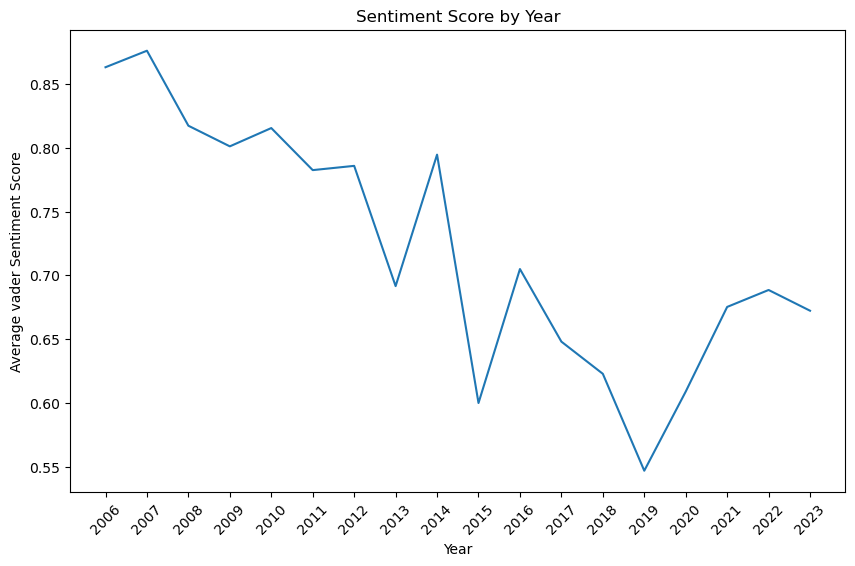

In [18]:
# using vaderSentiment at transcript level
analyzer = SentimentIntensityAnalyzer()


def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores["compound"]

df_sentiment['vsentiment'] = df_sentiment['clean_transcript'].apply(get_sentiment_score)
df_sentiment['year'] = pd.to_datetime(df_sentiment['published_timestamp']).dt.year.astype(int)
plt.figure(figsize=(10, 6))
df_sentiment.groupby('year')['vsentiment'].mean().plot(kind='line')
plt.title('Sentiment Score by Year')
plt.xlabel('Year')
plt.ylabel('Average vader Sentiment Score')
plt.xticks(df_sentiment['year'].unique(), rotation=45)
plt.show()

In [19]:
#using vaderSentiment at word level

def get_word_polarity_scores(text):
    words = nltk.word_tokenize(text)
    word_polarity_scores = {}

    for word in words:
        score = analyzer.polarity_scores(word)["compound"]
        word_polarity_scores[word] = score
    return word_polarity_scores

df_sentiment["word_polarity_scores"] = df_sentiment["clean_transcript"].apply(get_word_polarity_scores)

def get_text_polarity_score(word_polarity_scores):
    scores = list(word_polarity_scores.values())
    if scores:
        average = sum(scores) / len(scores)
    else:
        average = 0
    return average

df_sentiment["text_polarity_score"] = df_sentiment["word_polarity_scores"].apply(get_text_polarity_score)

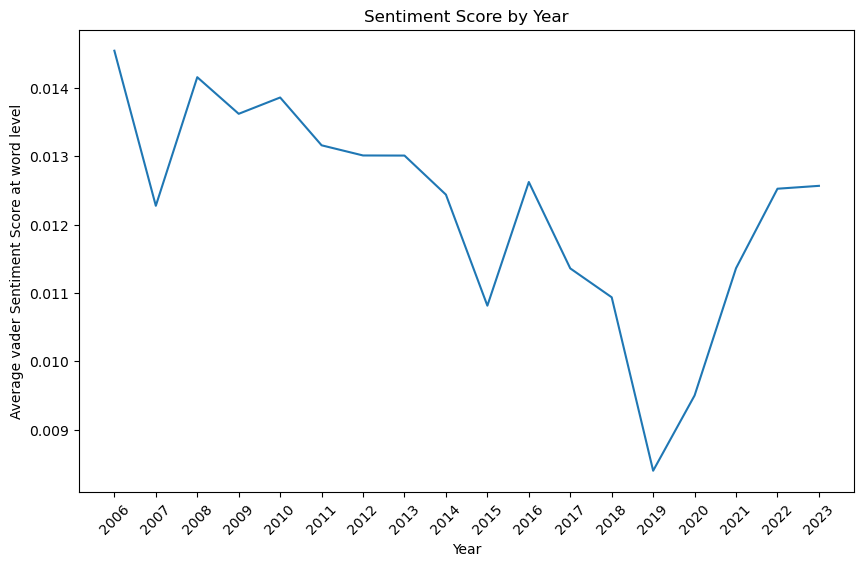

In [20]:
df_sentiment['year'] = pd.to_datetime(df_sentiment['published_timestamp']).dt.year.astype(int)
plt.figure(figsize=(10, 6))
df_sentiment.groupby('year')['text_polarity_score'].mean().plot(kind='line')
plt.title('Sentiment Score by Year')
plt.xlabel('Year')
plt.ylabel('Average vader Sentiment Score at word level')
plt.xticks(df_sentiment['year'].unique(), rotation=45)
plt.show()

In [21]:
positive_threshold = 0.5
negative_threshold = -0.5

df_positive = df_sentiment[df_sentiment["word_polarity_scores"].apply(lambda x: any(score >= positive_threshold for score in 
                                                                                    x.values()))]
df_negative = df_sentiment[df_sentiment["word_polarity_scores"].apply(lambda x: any(score <= negative_threshold for score in 
                                                                                    x.values()))]
fdist_positive = FreqDist()
for i, row in df_positive.iterrows():
    text = row["clean_transcript"]
    word_polarity_scores = row["word_polarity_scores"]
    for word in text.split():
        if word in word_polarity_scores:
            if word_polarity_scores[word] >= positive_threshold:
                fdist_positive[word] += 1
positive_words = {word: freq for word, freq in fdist_positive.items() if freq > 10}



fdist_negative = FreqDist()
for i, row in df_negative.iterrows():
    text = row["clean_transcript"]
    word_polarity_scores = row["word_polarity_scores"]
    for word in text.split():
        if word in word_polarity_scores:
            if word_polarity_scores[word] <= negative_threshold:
                fdist_negative[word] += 1

negative_words = {word: freq for word, freq in fdist_negative.items() if freq > 10}

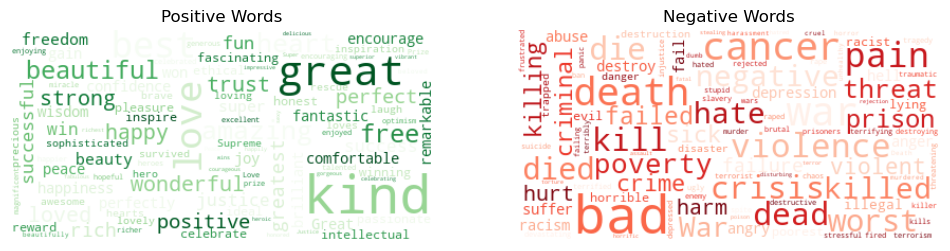

In [22]:
import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
# Create a word cloud for the positive words
wc_positive = WordCloud(background_color="white", max_words=100, max_font_size=50, colormap=matplotlib.colormaps["Greens"])
wc_positive.generate_from_frequencies(positive_words)

# Create a word cloud for the negative words
wc_negative = WordCloud(background_color="white", max_words=100, max_font_size=50, colormap=matplotlib.colormaps["Reds"])
wc_negative.generate_from_frequencies(negative_words)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Words")
plt.subplot(1, 2, 2)
plt.imshow(wc_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Words")
plt.show()

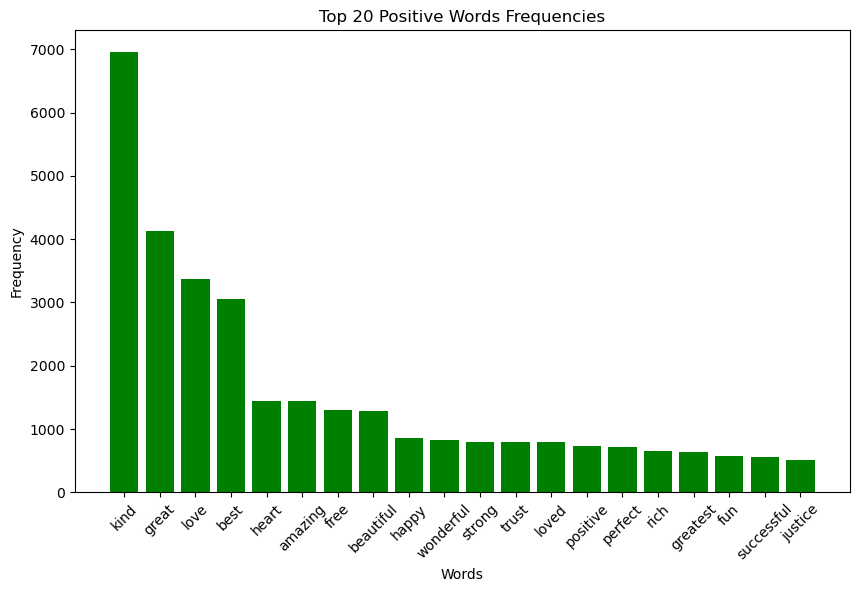

In [23]:
positive_words_series = pd.Series(positive_words)
positive_words_series = positive_words_series.sort_values(ascending=False)
top_20_positive_words = positive_words_series.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20_positive_words.index, top_20_positive_words.values, color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Positive Words Frequencies')
plt.xticks(top_20_positive_words.index, rotation=45)
plt.show()

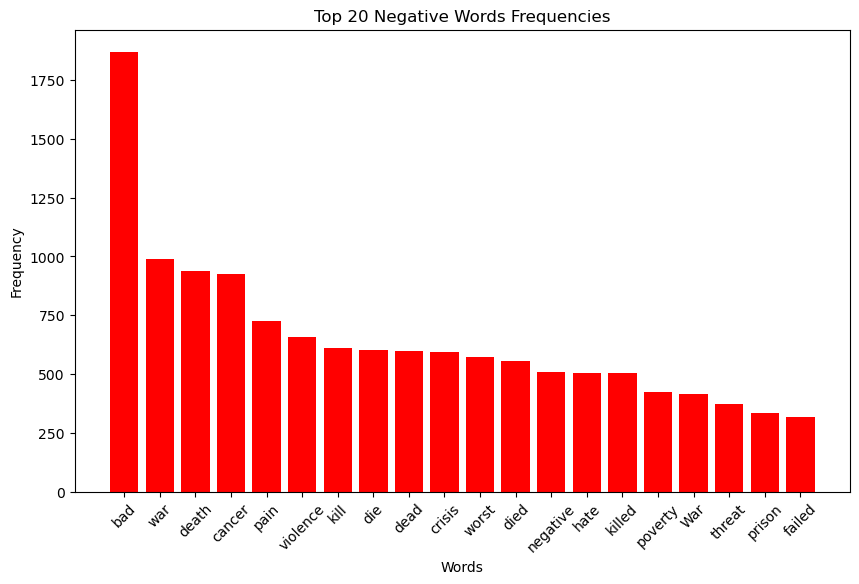

In [24]:
negative_words_series = pd.Series(negative_words)
negative_words_series = negative_words_series.sort_values(ascending=False)
top_20_negative_words = negative_words_series.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20_negative_words.index, top_20_negative_words.values, color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Negative Words Frequencies')
plt.xticks(top_20_negative_words.index, rotation=45)
plt.show()

### 3. Using cosine and euclidian distance to compute accuracy

In [25]:
df_sentiment[['text_polarity_score', 'related_talk_0_slug','related_talk_1_slug','related_talk_2_slug','related_talk_3_slug',
              'related_talk_4_slug','related_talk_5_slug']].isna().sum()

text_polarity_score      0
related_talk_0_slug      1
related_talk_1_slug      1
related_talk_2_slug      1
related_talk_3_slug    563
related_talk_4_slug    564
related_talk_5_slug    565
dtype: int64

In [26]:
df2=df_sentiment[['talk_slug','text_polarity_score', "vsentiment",'related_talk_0_slug','related_talk_1_slug',
                  'related_talk_2_slug','related_talk_3_slug','related_talk_4_slug','related_talk_5_slug']].dropna()

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist

def cosine_acc(column, data):
    df3=data[['talk_slug',column]]
    accuracy_scores = []

    for index, row in data.iterrows():
        current_score = row[column]
        related_slugs = [row['related_talk_0_slug'], row['related_talk_1_slug'], row['related_talk_2_slug'], 
                         row['related_talk_3_slug'], row['related_talk_4_slug'],row['related_talk_5_slug']]
        related_scores = pd.merge(df3, pd.DataFrame({'talk_slug': related_slugs}), on='talk_slug')[column]
        # Reshape the arrays to 2D
        current_score = np.array(current_score).reshape(1, -1)
        related_scores = np.array(related_scores).reshape(-1, 1)

        similarities = cosine_similarity(current_score, related_scores)
        # Flatten the matrix to 1D
        similarities = similarities.flatten()
        sorted_similarities = sorted(similarities, reverse=True)

        if sorted_similarities[0] == similarities[0]:
            accuracy_scores.append(1)
        else:
            accuracy_scores.append(0)


    accuracy = np.mean(accuracy_scores)
    return round(accuracy,2)

def euclidian_acc(column, data):
    df3=data[['talk_slug',column]]
    accuracy_scores = []

    for index, row in data.iterrows():
        current_score = row['text_polarity_score']
        related_slugs = [row['related_talk_0_slug'], row['related_talk_1_slug'], row['related_talk_2_slug'], 
                         row['related_talk_3_slug'], row['related_talk_4_slug']]
        related_scores = pd.merge(df3, pd.DataFrame({'talk_slug': related_slugs}), on='talk_slug')[column]

        current_score = np.array(current_score).reshape(1, -1)
        related_scores = np.array(related_scores).reshape(-1, 1)

        distances = cdist(current_score, related_scores, metric='euclidean')

        distances = distances.flatten()
        sorted_distances = sorted(distances)

        if sorted_distances[0] == distances[0]:
            accuracy_scores.append(1)
        else:
            accuracy_scores.append(0)

    accuracy = np.mean(accuracy_scores)
    return round(accuracy,2)


In [28]:
from tabulate import tabulate
cols={'Word-level sentiment score':'text_polarity_score','Talk-level sentiment score':'vsentiment'}

datalist=[]
for key, value in cols.items():
    cosine = cosine_acc(value, df2)
    euclidean = euclidian_acc(value, df2)
    datalist.append([key, cosine, euclidean])

headers = ["Type of sentiment score","Cosine","Euclidean"]

table = tabulate(datalist, headers, tablefmt="grid")
print(table)

+----------------------------+----------+-------------+
| Type of sentiment score    |   Cosine |   Euclidean |
+============================+==========+=============+
| Word-level sentiment score |     0.87 |        0.23 |
+----------------------------+----------+-------------+
| Talk-level sentiment score |     0.84 |        0.25 |
+----------------------------+----------+-------------+


### 4. Sentiment score analytics

#### Which TED talk topic has the highest positive sentiment? 

In [29]:
grouped = df_sentiment.groupby("topic_0_name")["text_polarity_score"].mean()

sorting = grouped.sort_values(ascending=False)

print(sorting.head(1))

#print(f"The topic with the highest positive sentiment is {mean_sentiment_by_topics.index[0]}, with an average sentiment score of {mean_sentiment_by_topics[0]:.2f}.")

topic_0_name
cancer    0.048443
Name: text_polarity_score, dtype: float64


In [30]:
grouped = df_sentiment.groupby("topic_0_name")["vsentiment"].mean()

sorting = grouped.sort_values(ascending=False)

print(sorting.head(1))

topic_0_name
empathy    1.0
Name: vsentiment, dtype: float64


#### Which speaker has the most polarized sentiment? 

In [ ]:
grouped = df_sentiment.groupby("speakers_name")["vsentiment"].std()
sorting = grouped.sort_values(ascending=False)
print(sorting.head(1))

comments_enabled
curator_approved
comments_logged_in_only
comments_enabled
external_service
is_featured
video_type_name
sentiment_score
speaker_name

In [32]:
df_sentiment.columns

Index(['transcript', 'talk_id', 'talk_slug', 'published_timestamp',
       'topic_0_name', 'related_talk_0_slug', 'related_talk_1_slug',
       'related_talk_2_slug', 'related_talk_3_slug', 'related_talk_4_slug',
       'related_talk_5_slug', 'Audio_Descriptions', 'Speaker_Changes_Start',
       'Speaker_Changes_Inside', 'clean_transcript', 'vsentiment', 'year',
       'word_polarity_scores', 'text_polarity_score'],
      dtype='object')